<a href="https://colab.research.google.com/github/SurekhaBerlin/Pizza-price-prediction-using-ML/blob/main/Pizza_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing Libraries

In [93]:
# Importing all the important libraries first

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## STEP 2: Importing the Data

In [94]:
main_df = pd.read_csv("pizza_v2.csv")
df = main_df.copy()

## STEP 3: Data Understanding

In [95]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [96]:
# Checking the shape of the dataset

df.shape

(129, 9)

In [97]:
# Checking the basic information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [98]:
# Number of unique values present in each feature column

df.nunique()

,0
company,5
price_rupiah,43
diameter,12
topping,12
variant,20
size,6
extra_sauce,2
extra_cheese,2
extra_mushrooms,2


In [99]:
df.isna().any()

,0
company,False
price_rupiah,False
diameter,False
topping,False
variant,False
size,False
extra_sauce,False
extra_cheese,False
extra_mushrooms,False


In [100]:
df.isna().sum()

,0
company,0
price_rupiah,0
diameter,0
topping,0
variant,0
size,0
extra_sauce,0
extra_cheese,0
extra_mushrooms,0


In [101]:
# Descriptive Statistics

df.describe().T

,count,unique,top,freq
company,129,5,C,30
price_rupiah,129,43,"Rp72,000",11
diameter,129,12,12 inch,49
topping,129,12,chicken,29
variant,129,20,classic,30
size,129,6,medium,41
extra_sauce,129,2,yes,76
extra_cheese,129,2,yes,86
extra_mushrooms,129,2,yes,72


In [102]:
df.dtypes

,0
company,object
price_rupiah,object
diameter,object
topping,object
variant,object
size,object
extra_sauce,object
extra_cheese,object
extra_mushrooms,object


## STEP 4 : Data Cleaning

In [103]:
# Counting Duplicates
duplicate_count = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 2


## STEP 5 : Data Preprocessing

In [104]:
# We want to remove the inch and Rp from the value
df.rename({'price_rupiah': 'price'},axis = 1,inplace = True)

In [105]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [106]:
df['price']=df['price'].str.replace('Rp','')
df['price']=df['price'].str.replace(',','')

In [107]:
df['price']=pd.to_numeric(df['price'],errors = 'coerce')

In [108]:
df['diameter']=df['diameter'].str.replace('inch','')
df['diameter']=pd.to_numeric(df['diameter'],errors = 'coerce')

In [109]:

df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [110]:
def convert(value):
  return  value * 0.0054

In [111]:
df['price'] = df['price'].apply(convert)

In [112]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [113]:
df['price']= df['price'].astype(int)

In [137]:
df['company'].value_counts()

,count
company,
C,30
E,30
A,25
B,24
D,20


## Univariate Analysis

Price Distribution

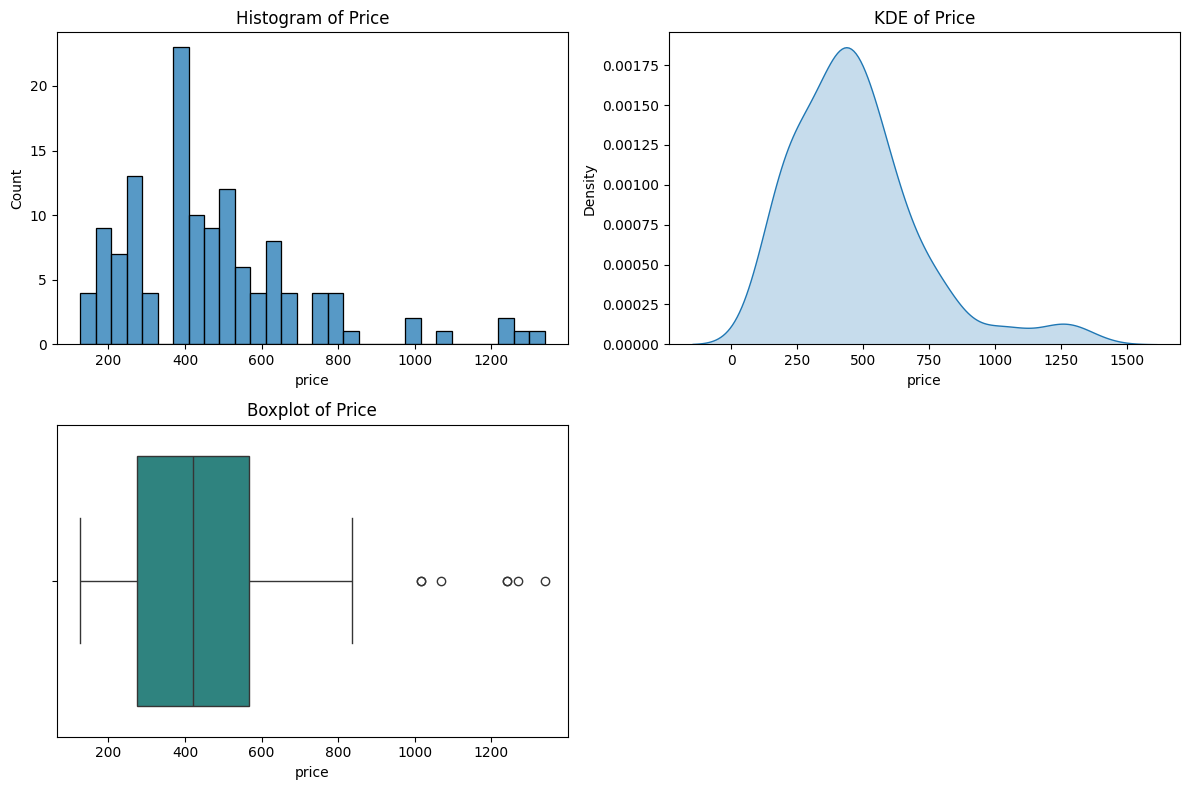

In [118]:
# Checking and visualizing the type of distribution of a feature column
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'price' column exists and is numeric
if 'price' in df.columns:
    # Ensure 'price' is a numeric column
    if pd.api.types.is_numeric_dtype(df['price']):
        # Set up the figure size
        plt.figure(figsize=(12, 8))

        # Plot Histogram with 'viridis' color palette
        plt.subplot(2, 2, 1)
        sns.histplot(df['price'], kde=False,  bins=30, palette='viridis')
        plt.title('Histogram of Price')

        # Plot KDE plot
        plt.subplot(2, 2, 2)
        sns.kdeplot(df['price'], shade=True,  palette='viridis')
        plt.title('KDE of Price')

        # Plot Boxplot
        plt.subplot(2, 2, 3)
        sns.boxplot(x=df['price'], palette='viridis')
        plt.title('Boxplot of Price')

        # Show the plots
        plt.tight_layout()
        plt.show()

    else:
        print("'price' column is not numeric.")
else:
    print("Column 'price' does not exist in the DataFrame.")


Diameter Distribution

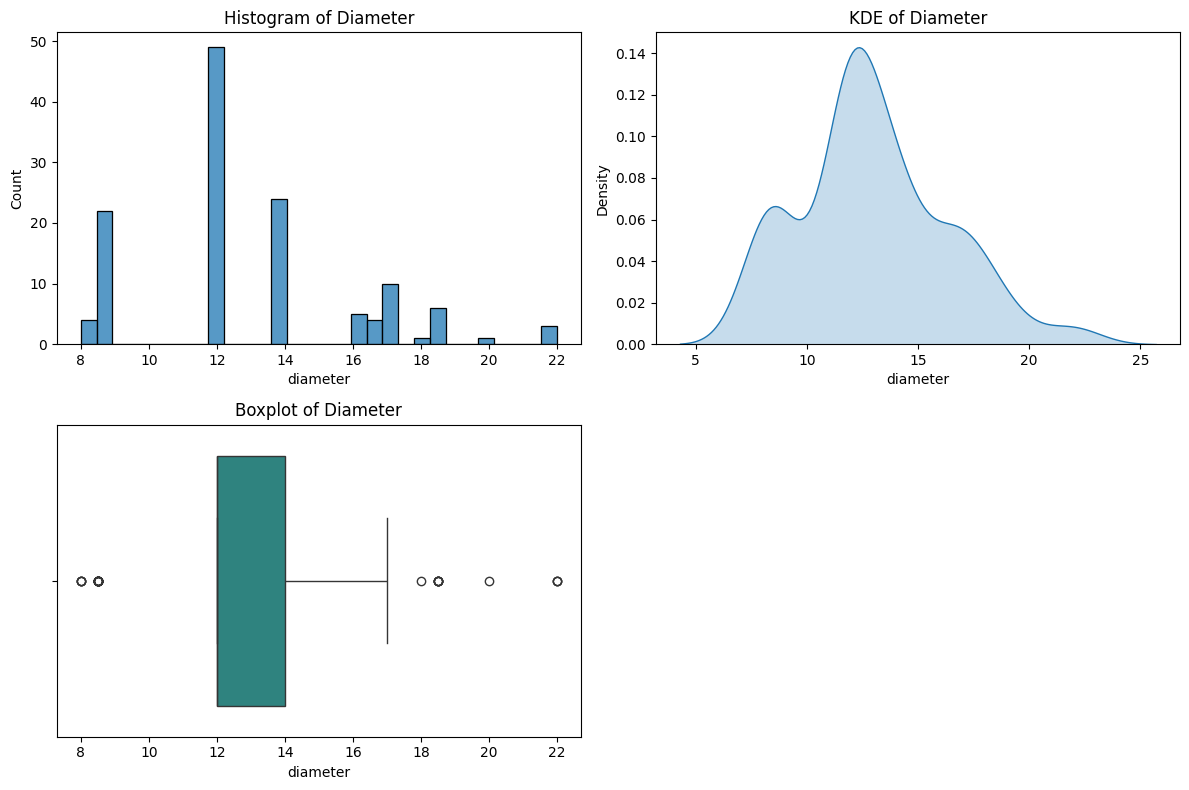

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'diameter' column exists and is numeric
if 'diameter' in df.columns:
    # Ensure 'diameter' is a numeric column
    if pd.api.types.is_numeric_dtype(df['diameter']):
        # Set up the figure size
        plt.figure(figsize=(12, 8))

        # Plot Histogram with 'viridis' color palette
        plt.subplot(2, 2, 1)
        sns.histplot(df['diameter'], kde=False, bins=30, palette='viridis')
        plt.title('Histogram of Diameter')

        # Plot KDE plot
        plt.subplot(2, 2, 2)
        sns.kdeplot(df['diameter'], shade=True, palette='viridis')
        plt.title('KDE of Diameter')

        # Plot Boxplot
        plt.subplot(2, 2, 3)
        sns.boxplot(x=df['diameter'],  palette='viridis')
        plt.title('Boxplot of Diameter')

        # Show the plots
        plt.tight_layout()
        plt.show()

    else:
        print("'diameter' column is not numeric.")
else:
    print("Column 'diameter' does not exist in the DataFrame.")


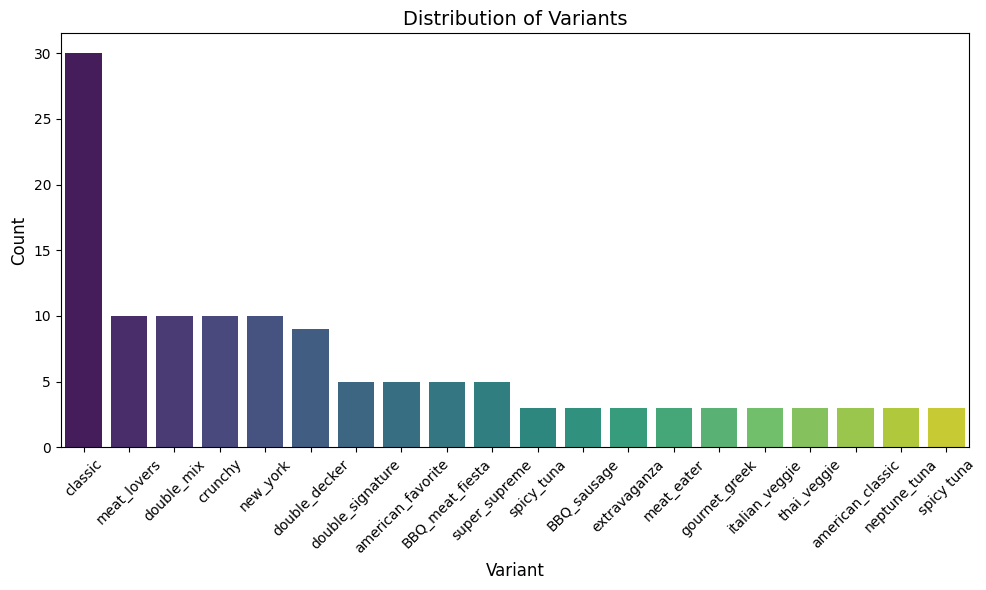

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 6))
# Get the order of categories based on the count (descending order)
order = df['variant'].value_counts().index
# Plot the distribution of 'variant' as a bar chart using a categorical palette (viridis)
sns.countplot(x='variant', data=df, palette='viridis',order = order)

# Add labels and title
plt.xlabel('Variant', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Variants', fontsize=14)  # Title of the plot
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


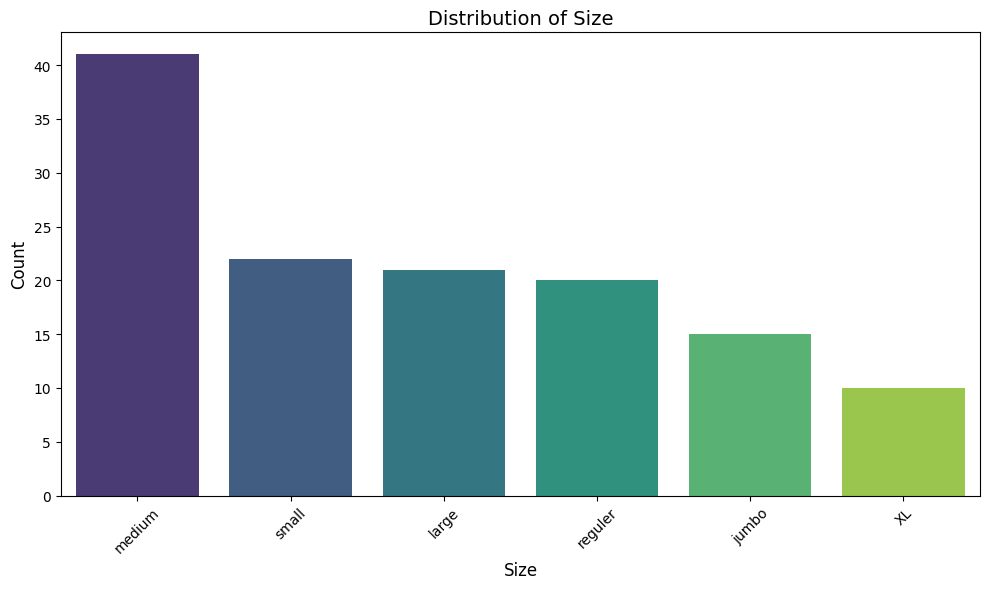

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 6))
# Get the order of categories based on the count (descending order)
order = df['size'].value_counts().index
# Plot the distribution of 'variant' as a bar chart using a categorical palette (viridis)
sns.countplot(x='size', data=df, palette='viridis', order=order)

# Add labels and title
plt.xlabel('Size', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Size', fontsize=14)  # Title of the plot
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


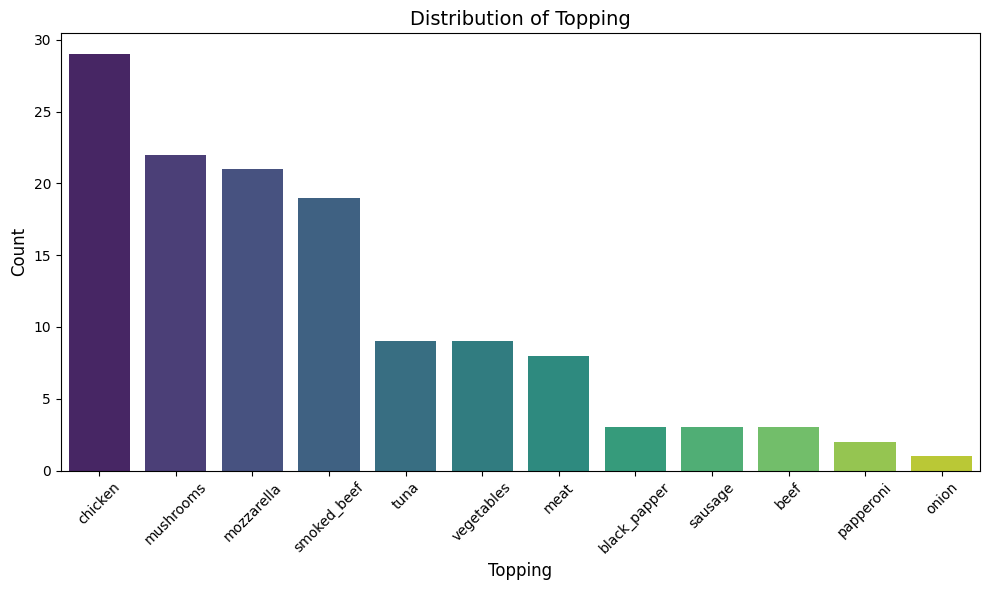

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 6))

# Get the order of categories based on the count (descending order)
order = df['topping'].value_counts().index

# Plot the distribution of 'topping' as a bar chart using a discrete color palette (e.g., 'Set2')
sns.countplot(x='topping', data=df, palette='viridis', order=order)

# Add labels and title
plt.xlabel('Topping', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Topping', fontsize=14)  # Title of the plot

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


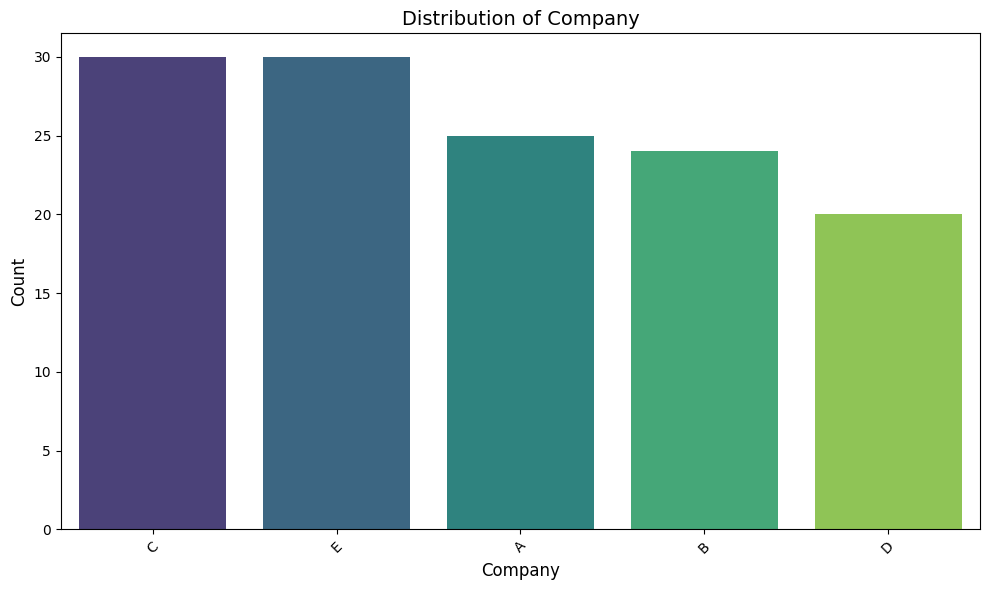

In [130]:

# Set up the figure size
plt.figure(figsize=(10, 6))

# Get the order of categories based on the count (descending order)
order = df['company'].value_counts().index

# Plot the distribution of 'topping' as a bar chart using a discrete color palette (e.g., 'Set2')
sns.countplot(x='company', data=df, palette='viridis', order=order)

# Add labels and title
plt.xlabel('Company', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)    # Label for y-axis
plt.title('Distribution of Company', fontsize=14)  # Title of the plot

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


Categorical Analysis

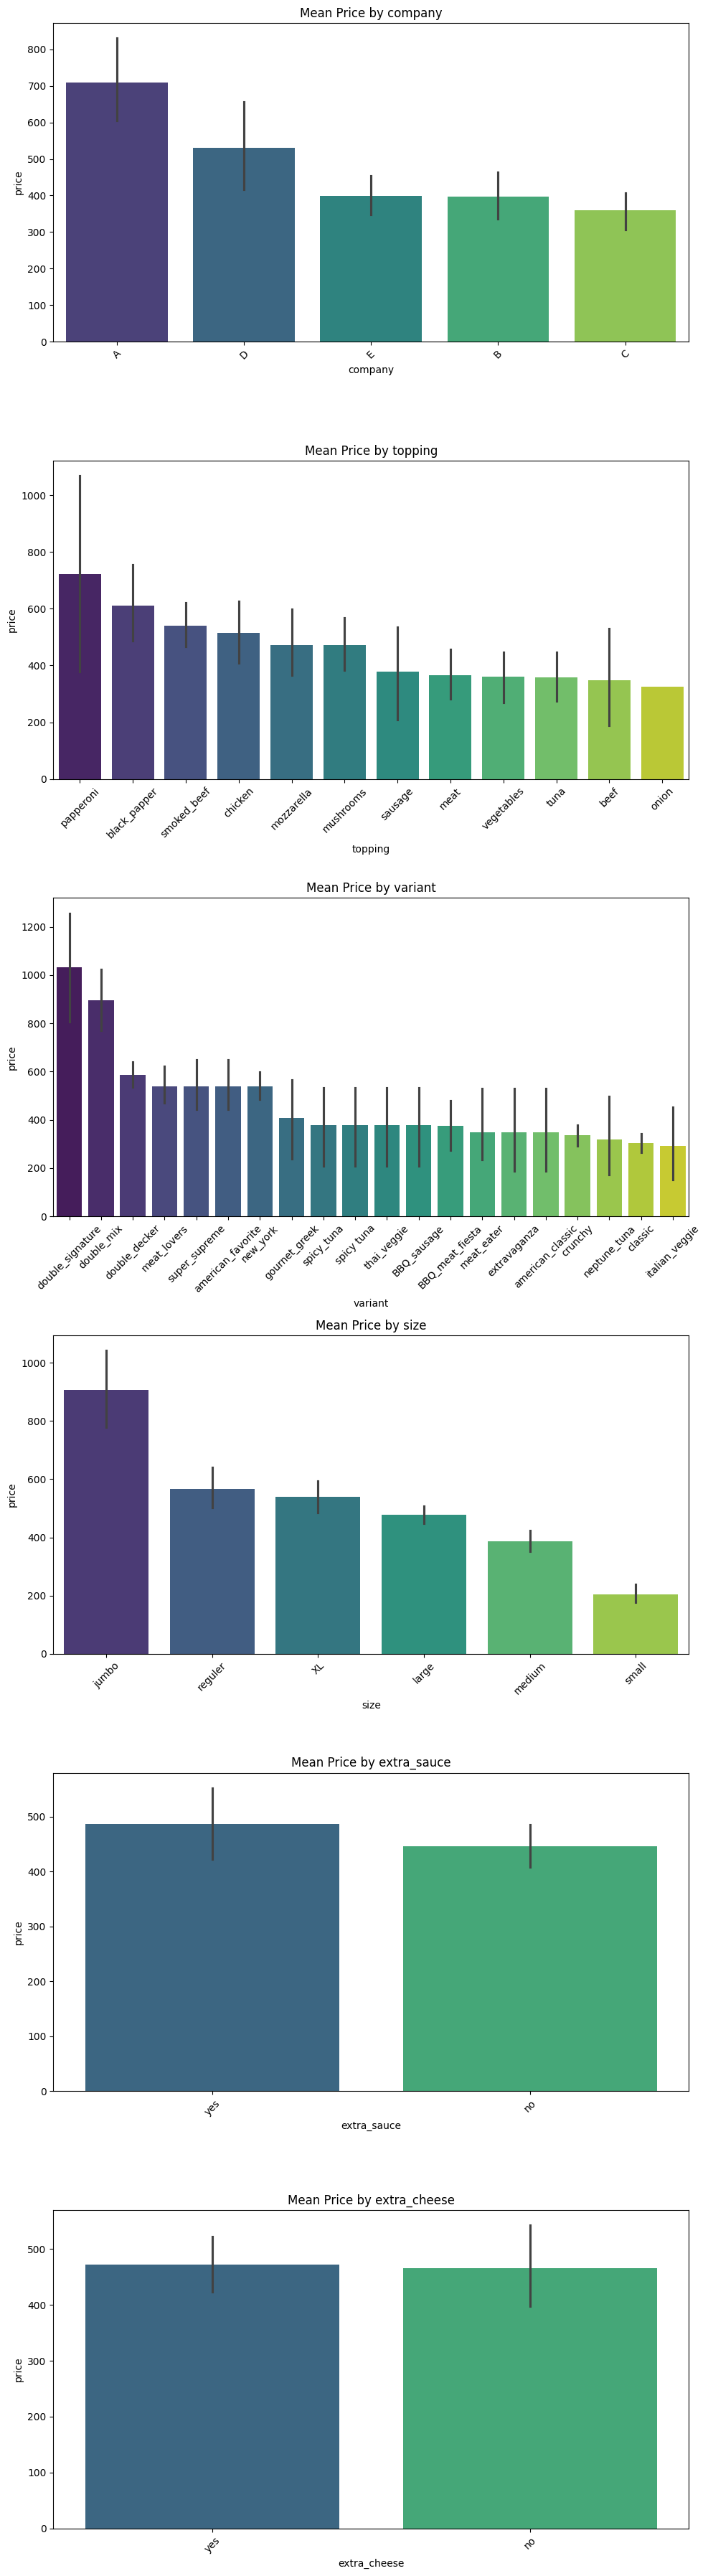

In [135]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define the categorical variables
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

# Set up the figure and axes for subplots
fig, axs = plt.subplots(len(cat_vars), 1, figsize=(10, 6 * len(cat_vars)))

# Loop through each categorical variable and plot
for i, var in enumerate(cat_vars):
    # Calculate the mean price by category
    mean_prices = df.groupby(var)['price'].mean().sort_values(ascending=False).index

    # Create the bar plot with sorted categories in descending order
    sns.barplot(x=var, y='price', data=df, ax=axs[i], estimator=np.mean, palette='viridis', order=mean_prices)

    # Rotate x-axis labels for readability
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_title(f'Mean Price by {var}')  # Set title for each plot

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()
